In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

In [3]:
# Load data
file_path = Path("Resources/hmda_2017_nationwide_all-records_codes.csv")
df = pd.read_csv(file_path)
df2 = df.drop(columns=["respondent_id", "applicant_race_2", "applicant_race_3", "applicant_race_4", "applicant_race_5",
                        "co_applicant_race_2", "co_applicant_race_3", "co_applicant_race_4", "co_applicant_race_5",
                        "denial_reason_2", "denial_reason_3", "rate_spread", "edit_status", "sequence_number", "application_date_indicator"])
df2.head()

,as_of_year,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,msamd,...,purchaser_type,denial_reason_1,hoepa_status,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,2017,9,1,1,3,1,9.0,3,3,33860.0,...,0,3.0,2,2,1948.0,12.58,59700.0,122.93,507.0,724.0
1,2017,9,3,1,1,1,94.0,3,6,33860.0,...,2,NaN,2,4,1948.0,12.58,59700.0,122.93,507.0,724.0
2,2017,7,3,1,3,1,161.0,3,5,33860.0,...,0,NaN,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0
3,2017,5,1,1,2,1,90.0,3,1,33860.0,...,1,NaN,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0
4,2017,9,1,1,3,2,41.0,3,1,33860.0,...,0,NaN,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14285496 entries, 0 to 14285495
Data columns (total 30 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   as_of_year                      int64  
 1   agency_code                     int64  
 2   loan_type                       int64  
 3   property_type                   int64  
 4   loan_purpose                    int64  
 5   owner_occupancy                 int64  
 6   loan_amount_000s                float64
 7   preapproval                     int64  
 8   action_taken                    int64  
 9   msamd                           float64
 10  state_code                      float64
 11  county_code                     float64
 12  census_tract_number             float64
 13  applicant_ethnicity             int64  
 14  co_applicant_ethnicity          int64  
 15  applicant_race_1                int64  
 16  co_applicant_race_1             int64  
 17  applicant_sex            

In [5]:
# Check null values
df2.isnull().sum()

as_of_year                               0
agency_code                              0
loan_type                                0
property_type                            0
loan_purpose                             0
owner_occupancy                          0
loan_amount_000s                      5036
preapproval                              0
action_taken                             0
msamd                              1791050
state_code                          197158
county_code                         245597
census_tract_number                 284302
applicant_ethnicity                      0
co_applicant_ethnicity                   0
applicant_race_1                         0
co_applicant_race_1                      0
applicant_sex                            0
co_applicant_sex                         0
applicant_income_000s              1895864
purchaser_type                           0
denial_reason_1                   12873526
hoepa_status                             0
lien_status

In [6]:
# Fill empty denial reason with zero and drop nulls
df3 = df2
df3["denial_reason_1"] = df3["denial_reason_1"].replace(np.nan, 0)
df3 = df3.dropna()
df3.head()

,as_of_year,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,msamd,...,purchaser_type,denial_reason_1,hoepa_status,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,2017,9,1,1,3,1,9.0,3,3,33860.0,...,0,3.0,2,2,1948.0,12.58,59700.0,122.93,507.0,724.0
2,2017,7,3,1,3,1,161.0,3,5,33860.0,...,0,0.0,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0
3,2017,5,1,1,2,1,90.0,3,1,33860.0,...,1,0.0,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0
4,2017,9,1,1,3,2,41.0,3,1,33860.0,...,0,0.0,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0
6,2017,3,2,1,1,1,76.0,3,1,33860.0,...,6,0.0,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0


In [7]:
df3.isnull().sum()

as_of_year                        0
agency_code                       0
loan_type                         0
property_type                     0
loan_purpose                      0
owner_occupancy                   0
loan_amount_000s                  0
preapproval                       0
action_taken                      0
msamd                             0
state_code                        0
county_code                       0
census_tract_number               0
applicant_ethnicity               0
co_applicant_ethnicity            0
applicant_race_1                  0
co_applicant_race_1               0
applicant_sex                     0
co_applicant_sex                  0
applicant_income_000s             0
purchaser_type                    0
denial_reason_1                   0
hoepa_status                      0
lien_status                       0
population                        0
minority_population               0
hud_median_family_income          0
tract_to_msamd_income       

In [18]:
loan_amt_counts = df3["loan_amount_000s"].value_counts()
loan_amt_counts[:500]

424.0    139117
200.0     97840
100.0     95371
150.0     84910
160.0     65595
          ...  
254.0     18951
239.0     18870
263.0     18821
1.0       18775
500.0     18752
Name: loan_amount_000s, Length: 236, dtype: int64

<AxesSubplot:ylabel='Density'>

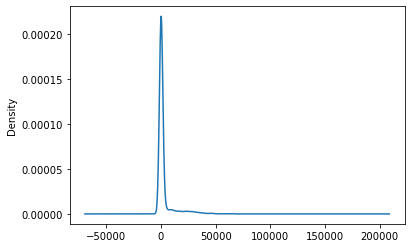

In [15]:
loan_amt_counts.plot.density()

In [19]:
cutoff = np.percentile(df3["loan_amount_000s"], 99.5)
print(cutoff)

1360.0


In [8]:
prop_sample_df = df3.groupby("action_taken", group_keys=False).apply(lambda x: x.sample(frac=0.01))

In [9]:
prop_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108022 entries, 908506 to 13993737
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   as_of_year                      108022 non-null  int64  
 1   agency_code                     108022 non-null  int64  
 2   loan_type                       108022 non-null  int64  
 3   property_type                   108022 non-null  int64  
 4   loan_purpose                    108022 non-null  int64  
 5   owner_occupancy                 108022 non-null  int64  
 6   loan_amount_000s                108022 non-null  float64
 7   preapproval                     108022 non-null  int64  
 8   action_taken                    108022 non-null  int64  
 9   msamd                           108022 non-null  float64
 10  state_code                      108022 non-null  float64
 11  county_code                     108022 non-null  float64
 12  census_tr

In [10]:
save_path = "Resources/prop_sample.csv"
prop_sample_df.to_csv(save_path, index=False)